In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,recall_score
import seaborn as sns
plt.style.use('ggplot')

In [3]:
fake_df=pd.read_csv(r"C:\Users\vaish\Downloads\Project on RNN\Project on RNN\Dataset\Fake.csv")
real_df=pd.read_csv(r"C:\Users\vaish\Downloads\Project on RNN\Project on RNN\Dataset\True.csv")

In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# Checking for null values
fake_df.isnull().sum()


title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
real_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
fake_df.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [9]:
real_df.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [10]:
fake_df.drop(['date','subject'],axis=1,inplace=True)
real_df.drop(['date','subject'],axis=1,inplace=True)

In [11]:
fake_df['class']=0
real_df['class']=1  # numeric identifier

Text(0, 0.5, 'Proportion of News Articles')

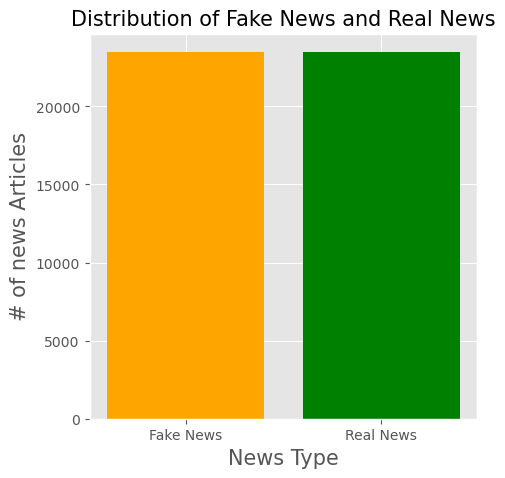

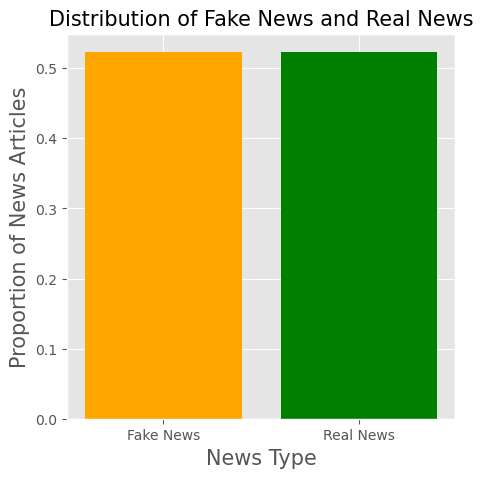

In [12]:
plt.figure(figsize=(5,5))
plt.bar('Fake News',len(fake_df),color='orange')
plt.bar('Real News',len(fake_df),color='green')
plt.title('Distribution of Fake News and Real News',size=15)
plt.xlabel('News Type',size=15)
plt.ylabel('# of news Articles',size=15)

total_len =len(fake_df)+len(real_df)
plt.figure(figsize=(5,5))
plt.bar('Fake News',len(fake_df)/total_len,color='orange')
#plt.text()
plt.bar('Real News',len(fake_df)/total_len,color='green')
#plt.text()
plt.title('Distribution of Fake News and Real News',size=15)
plt.xlabel('News Type',size=15)
plt.ylabel('Proportion of News Articles',size=15)

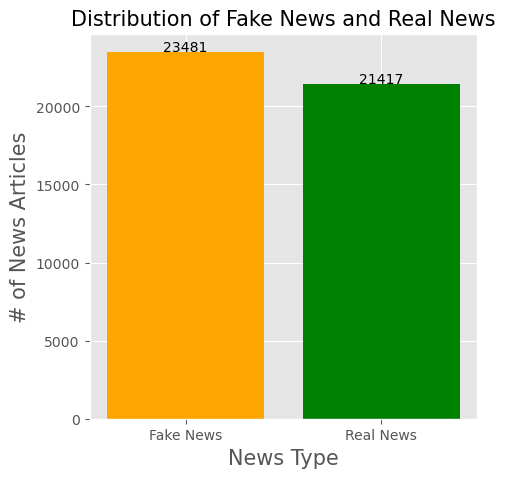

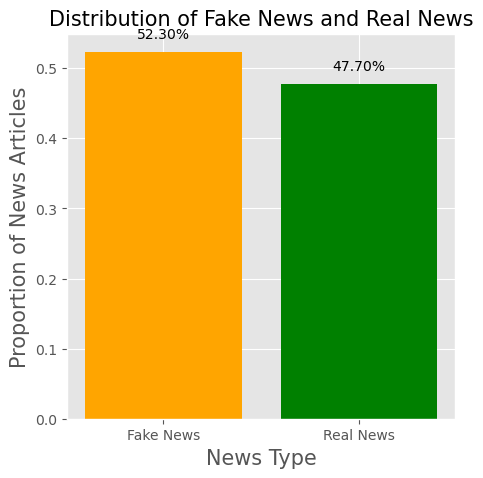

In [13]:
import matplotlib.pyplot as plt

# Assuming you have the fake_df and real_df DataFrames loaded
# Replace len(fake_df) and len(real_df) with actual lengths
fake_count = len(fake_df)  # Number of fake news articles
real_count = len(real_df)  # Number of real news articles

# Plot the count of Fake News and Real News
plt.figure(figsize=(5, 5))
plt.bar('Fake News', fake_count, color='orange')
plt.bar('Real News', real_count, color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)

# Add text on bars
plt.text('Fake News', fake_count + 50, f'{fake_count}', ha='center')
plt.text('Real News', real_count + 50, f'{real_count}', ha='center')

plt.show()

# Plot the proportion of Fake News and Real News
total_count = fake_count + real_count
fake_proportion = fake_count / total_count
real_proportion = real_count / total_count

plt.figure(figsize=(5, 5))
plt.bar('Fake News', fake_proportion, color='orange')
plt.bar('Real News', real_proportion, color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Proportion of News Articles', size=15)

# Add text on bars with percentage
plt.text('Fake News', fake_proportion + 0.02, f'{fake_proportion:.2%}', ha='center')
plt.text('Real News', real_proportion + 0.02, f'{real_proportion:.2%}', ha='center')

plt.show()


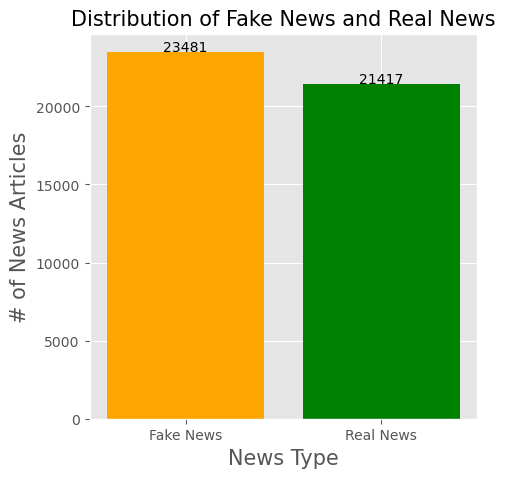

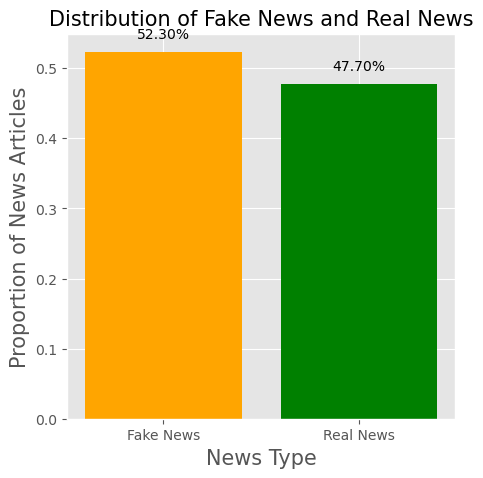

In [14]:
import matplotlib.pyplot as plt

# Assuming you have the fake_df and real_df DataFrames loaded
# Replace len(fake_df) and len(real_df) with actual lengths
fake_count = len(fake_df)  # Number of fake news articles
real_count = len(real_df)  # Number of real news articles

# Plot the count of Fake News and Real News
plt.figure(figsize=(5, 5))
plt.bar('Fake News', fake_count, color='orange')
plt.bar('Real News', real_count, color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)

# Add text on bars
plt.text('Fake News', fake_count + 50, f'{fake_count}', ha='center')
plt.text('Real News', real_count + 50, f'{real_count}', ha='center')

plt.show()

# Plot the proportion of Fake News and Real News
total_count = fake_count + real_count
fake_proportion = fake_count / total_count
real_proportion = real_count / total_count

plt.figure(figsize=(5, 5))
plt.bar('Fake News', fake_proportion, color='orange')
plt.bar('Real News', real_proportion, color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Proportion of News Articles', size=15)

# Add text on bars with percentage
plt.text('Fake News', fake_proportion + 0.02, f'{fake_proportion:.2%}', ha='center')
plt.text('Real News', real_proportion + 0.02, f'{real_proportion:.2%}', ha='center')

plt.show()


In [15]:
print('Difference in news articles:',len(fake_df)-len(real_df))


Difference in news articles: 2064


In [16]:
news_df=pd.concat([fake_df,real_df],ignore_index=True,sort=False)
news_df.head()

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [17]:
news_df['text']=news_df['title']+news_df['text']
news_df.drop('title',axis=1,inplace=True)

In [18]:
features=news_df['text']
targets=news_df['class']

X_train,X_test,y_train,y_test=train_test_split(features,targets,test_size=0.20,random_state=9)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35918,)
(8980,)
(35918,)
(8980,)


In [19]:
def normalize(data):
    normalized=[]
    for i in data:
        i=i.lower()
        i=re.sub('https?://\S+|www.\.\S+','',i) #sub is used to remove /replace characters
        i=re.sub('\\W',' ',i) # junk data with whitespaces will get removed,non words .numerical .any images
        i=re.sub('\n','',i) 
        i=re.sub(' +',' ',i)
        i=re.sub('^ ','',i) 
        i=re.sub(' $','',i) 
        normalized.append(i)
    return normalized


X_train = normalize(X_train)
X_test=normalize(X_test)      # in production dataflux is used for data cleaning we dont guess the special characters and remove it, using third third party apps

In [80]:
X_train_subset=[row[:10] for row in X_train]
X_train_subset

['democrats ',
 'russia say',
 'trump urge',
 'lunatic gl',
 'only 25 of',
 'millennial',
 'china must',
 'breaking w',
 'frankfurt ',
 'vp candida',
 'watch what',
 'saudi prin',
 'we will no',
 'u s secret',
 'iraq 1991 ',
 'abortion e',
 'trump s ta',
 'trump advi',
 'spd agrees',
 'facebook u',
 'xi says ch',
 'ex u s att',
 'oops new e',
 'frightenin',
 'media trip',
 'boxing leg',
 'ag session',
 'breitbart ',
 'u s ally s',
 'justice de',
 'trump tout',
 'rough star',
 'watch cnn ',
 'after 8 ye',
 'watch maxi',
 'germany wo',
 'clinton wa',
 'in brussel',
 'ex rival s',
 'trump trie',
 'u s quits ',
 'melania tr',
 'boston bra',
 'even trump',
 'trump thre',
 'the baby p',
 'house spea',
 'british co',
 'fake bomb ',
 'strange tr',
 'republican',
 'democrats ',
 'u s to app',
 'exclusive ',
 'sec of sta',
 'eu ready t',
 'maine sena',
 'cnn clown ',
 'russia s h',
 'violent de',
 'congress a',
 'uk s may s',
 'watch sara',
 'brilliant ',
 'islamic st',
 'what s hil',
 'lie witn

In [20]:
# Tokenization

max_vocab=10000

tokenizer =Tokenizer(num_words=max_vocab)

tokenizer.fit_on_texts(X_train)

In [21]:
#Converting into numeric sequence
X_train =tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [22]:
# Model Generates better accuracy if text are of equal length
#X_train using keras.preprocessing.sequence.pad_sequence fn ,finds len of word and makes len of 2 words equal
# max_len=256 
X_train=tf.keras.preprocessing.sequence.pad_sequences(X_train,padding='post',maxlen=256)
X_test=tf.keras.preprocessing.sequence.pad_sequences(X_test,padding='post',maxlen=256)

In [23]:
print(f"X_train :{X_train.shape} \nX_test : {X_test.shape}")

X_train :(35918, 256) 
X_test : (8980, 256)


In [24]:
# LSTM -->has unique feature ,it remembers the input feeded and gen o/p,2nd time it tunes 
# only bidirectional models has capability to remembering inputs what was state of hidden layer and o/p genrated
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,128),             
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
# it will see how is performance in 2 epochs --early stop,before concluding the 

early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_split=0.1,batch_size=30,shuffle=True,callbacks=[early_stop])
              


Epoch 1/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 173s 153ms/step - accuracy: 0.7662 - loss: 0.3969 - val_accuracy: 0.9878 - val_loss: 0.0479
Epoch 2/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 204s 155ms/step - accuracy: 0.9884 - loss: 0.0483 - val_accuracy: 0.9897 - val_loss: 0.0352
Epoch 3/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 171s 158ms/step - accuracy: 0.9948 - loss: 0.0233 - val_accuracy: 0.9914 - val_loss: 0.0277
Epoch 4/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 172s 159ms/step - accuracy: 0.9969 - loss: 0.0125 - val_accuracy: 0.9908 - val_loss: 0.0294
Epoch 5/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 173s 160ms/step - accuracy: 0.9985 - loss: 0.0071 - val_accuracy: 0.9925 - val_loss: 0.0259
Epoch 6/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 198s 157ms/step - accuracy: 0.9981 - loss: 0.0065 - val_accuracy: 0.9916 - val_loss: 0.0295
Epoch 7/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 172s 160ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9925 - val_loss: 0.0353


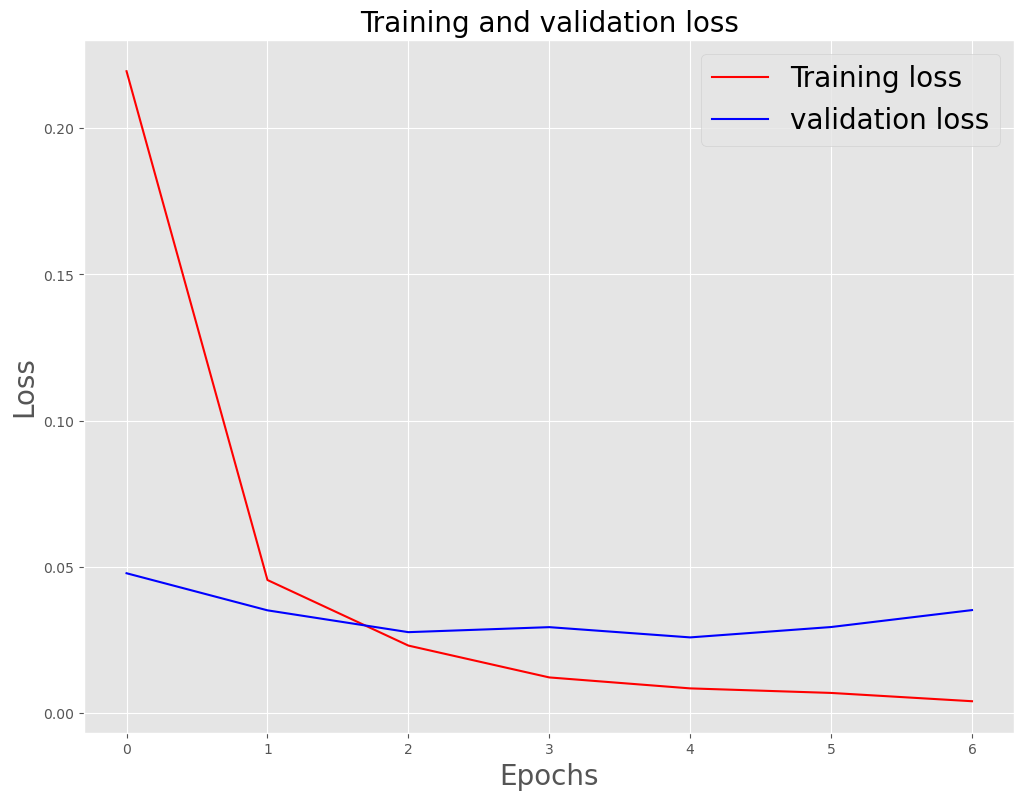

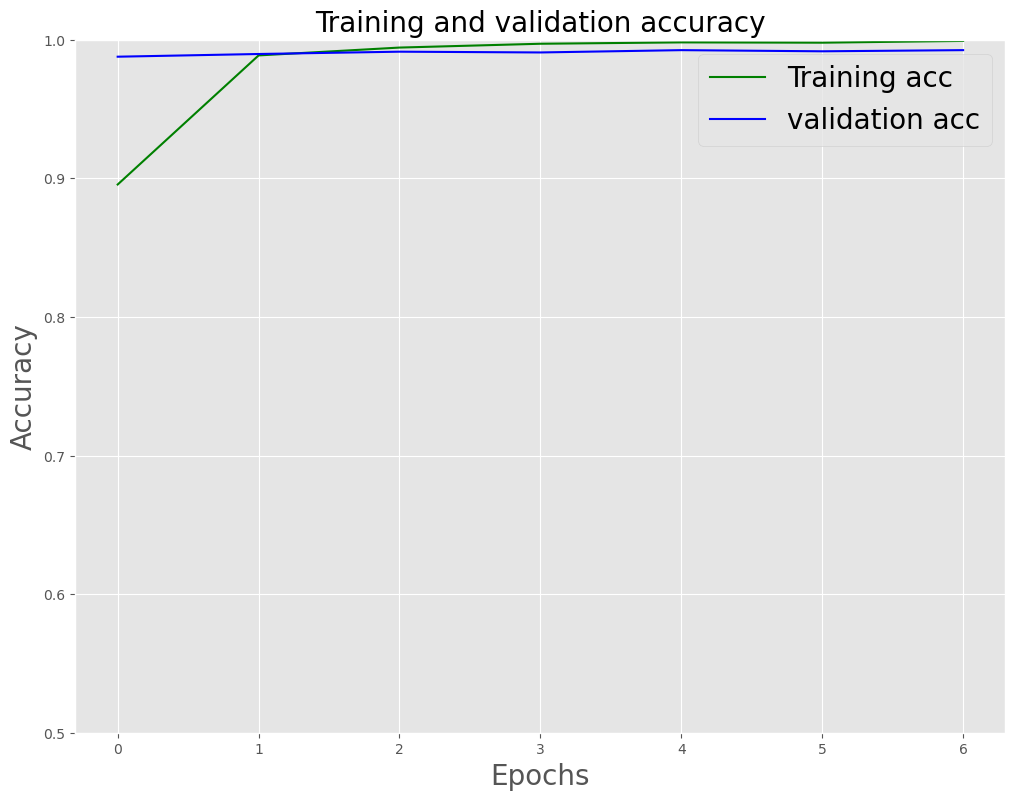

In [26]:
history_dict=history.history
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=history.epoch
plt.figure(figsize=(12,9))
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss',size=20)
plt.xlabel('Epochs',size=20)
plt.ylabel('Loss',size=20)
plt.legend(prop={'size':20})
plt.show()
plt.figure(figsize=(12,9))
plt.plot(epochs,acc,'g',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation accuracy',size=20)
plt.xlabel('Epochs',size=20)
plt.ylabel('Accuracy',size=20)
plt.legend(prop={'size':20})
plt.ylim((0.5,1))
plt.show()

In [27]:
model.evaluate(X_test,y_test)

281/281 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.9909 - loss: 0.0392


[0.0339769646525383, 0.9918708205223083]

In [28]:
pred=model.predict(X_test)
pred

binary_prediction=[]

for i in pred:
    if i>=0.5:
        binary_prediction.append(1)
    else:
        binary_prediction.append(0)

281/281 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step


In [29]:
print('Accuracy on testing set:',accuracy_score(binary_prediction,y_test))
print('Precision on testing set:',precision_score(binary_prediction,y_test))
print('Recall on testing set:',recall_score(binary_prediction,y_test))

Accuracy on testing set: 0.9918708240534521
Precision on testing set: 0.9872861766065649
Recall on testing set: 0.9958032175332245


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

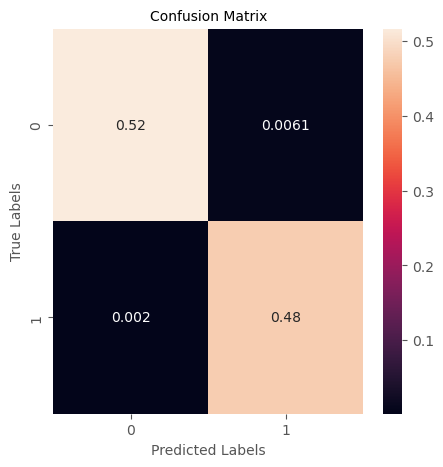

In [30]:
matrix=confusion_matrix(binary_prediction,y_test,normalize='all')
plt.figure(figsize=(5,5))
ax=plt.subplot()
sns.heatmap(matrix,annot=True,ax=ax)
ax.set_xlabel('Predicted Labels',size=10)
ax.set_ylabel('True Labels',size=10)
ax.set_title('Confusion Matrix',size=10)
ax.xaxis.set_ticklabels([0,1],size=10)
ax.yaxis.set_ticklabels([0,1],size=10)